In [1]:
import time
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from IPython.display import display, clear_output

In [2]:
plt.ion()

In [3]:
options = webdriver.ChromeOptions()
options.add_argument("--headless")  
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [4]:
URL = "https://www.worldometers.info/world-population/"

def get_population():
    """Fetch live population data using Selenium"""
    driver.get(URL)
    time.sleep(2)  
    try:
        population_element = driver.find_element(By.CSS_SELECTOR, "div#maincounter-wrap span")
        population = population_element.text.replace(",", "")  
        return int(population)
    except Exception as e:
        print(f"Error: {e}")
        return None


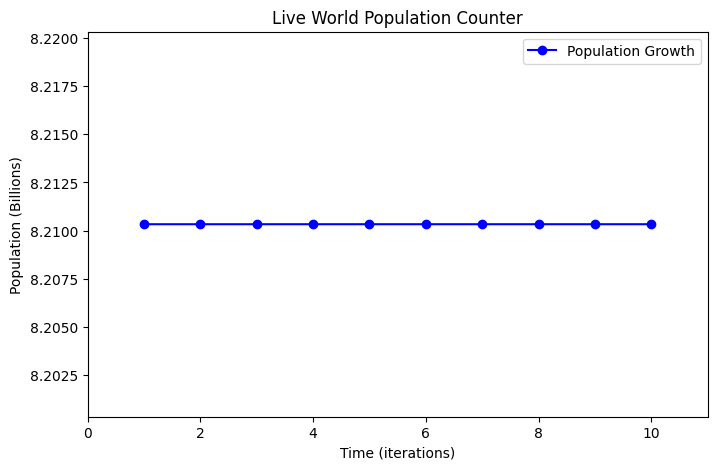

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))  
x_data, y_data = [], []

ax.set_title("Live World Population Counter")
ax.set_xlabel("Time (iterations)")
ax.set_ylabel("Population (Billions)")  
line, = ax.plot([], [], marker='o', linestyle='-', color='b', label="Population Growth")
ax.legend()

for i in range(1, 11):  
    current_population = get_population()  
    
    if current_population is not None:
        pop_billion = current_population / 1_000_000_000  
        x_data.append(i)  
        y_data.append(pop_billion)  

        print(f"Iteration {i}: Population = {pop_billion:.3f} Billion")  

        line.set_data(x_data, y_data)

        ax.set_xlim(min(x_data) - 1, max(x_data) + 1)
        
        if len(y_data) > 1:  
            y_min = min(y_data) - 0.01  
            y_max = max(y_data) + 0.01 
            ax.set_ylim(y_min, y_max)  

        clear_output(wait=True)  
        display(fig) 
        plt.pause(3)  

plt.show()
